In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.datasets import reuters
from keras import models, layers
from keras.utils import to_categorical
import numpy as np

Using TensorFlow backend.


In [2]:
nWords = 10000

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=nWords)

In [3]:
outputDim = train_labels.max()

In [4]:
word_index = reuters.get_word_index()

In [5]:
reverse_word_index = dict(
    [(value, key) for key, value in word_index.items()]
)

sample_index = 83
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[sample_index]]
)

print(train_labels[sample_index])
print(decoded_review)

28
? the u s commodity credit corporation ccc has accepted a bid for an export bonus to cover a sale of 186 head of dairy cattle to egypt the u s agriculture department said the department said the cattle are for delivery may 7 june 7 1987 and the bonus awarded was 1 888 06 dlrs per head the bonus was made to first interstate trading co and will be paid to the exporter in the form of commodities from ccc stocks the department said an additional 7 959 head of dairy cattle are still available to egypt under the export enhancement program initiative announced september 12 1986 it said reuter 3


In [6]:
def vectorize_sequence(sequences, dimension=nWords):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1                    # fancy indexing
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [7]:
n_val = 2000

x_val = x_train[: n_val]
partial_x_train = x_train[n_val: ]

y_val = y_train[: n_val]
partial_y_train = y_train[n_val: ]


# Need to transform the train_labels and test_labels otherwise you'll run into an error during the next step
y_val = to_categorical(y_val)
partial_y_train = to_categorical(partial_y_train)
y_test = to_categorical(y_test)
print(partial_y_train.shape)

(6982, 46)


In [8]:
# Initialize model
model = models.Sequential()

# Adding a layer to the neuronal network
model.add(layers.Dense(
    50, 
    activation="relu", 
    input_shape = (nWords, )
))


# Adding a layer to the neuronal network
model.add(layers.Dense(
    48, 
    activation="relu"
))

# Add another layer
model.add(layers.Dense(
    46, 
    activation="softmax"
))

# Print summary
model.summary()

# The architecture of the model is setup but it cannot been trained yet.  Therefore, it needs to be compiled first:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                500050    
_________________________________________________________________
dense_2 (Dense)              (None, 48)                2448      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2254      
Total params: 504,752
Trainable params: 504,752
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(
    partial_x_train, partial_y_train,
    epochs=10,
    batch_size=128*2,
    validation_data=(x_val, y_val)
)

Train on 6982 samples, validate on 2000 samples
Epoch 1/10
6982/6982 [==============================] - 1s 146us/step - loss: 2.4613 - acc: 0.5444 - val_loss: 1.7111 - val_acc: 0.6435
Epoch 2/10
6982/6982 [==============================] - 1s 119us/step - loss: 1.3704 - acc: 0.7054 - val_loss: 1.3809 - val_acc: 0.6880
Epoch 3/10
6982/6982 [==============================] - 1s 117us/step - loss: 1.0392 - acc: 0.7726 - val_loss: 1.2031 - val_acc: 0.7315
Epoch 4/10
6982/6982 [==============================] - 1s 120us/step - loss: 0.8155 - acc: 0.8256 - val_loss: 1.1048 - val_acc: 0.7560
Epoch 5/10
6982/6982 [==============================] - 1s 119us/step - loss: 0.6435 - acc: 0.8612 - val_loss: 1.0600 - val_acc: 0.7700
Epoch 6/10
6982/6982 [==============================] - 1s 119us/step - loss: 0.5082 - acc: 0.8922 - val_loss: 1.0144 - val_acc: 0.7885
Epoch 7/10
6982/6982 [==============================] - 1s 119us/step - loss: 0.4020 - acc: 0.9155 - val_loss: 1.0221 - val_acc: 0.7835


In [10]:
print(history.history) 

{'val_loss': [1.711107162475586, 1.3809405832290649, 1.2030685482025147, 1.1048061809539795, 1.0599779539108276, 1.014428349494934, 1.022132158279419, 1.016341817855835, 1.0742336530685426, 1.0172094011306763], 'val_acc': [0.6434999995231628, 0.6880000019073487, 0.7314999995231628, 0.7560000004768371, 0.77, 0.7885000014305115, 0.7835000009536743, 0.7919999985694886, 0.7694999976158142, 0.7975000004768371], 'loss': [2.4612507853935526, 1.3704185062238803, 1.039153686398867, 0.8155199505646978, 0.6434541956567723, 0.5082384775870511, 0.4019980947085555, 0.31933354294187394, 0.2622832148259842, 0.21826288501023222], 'acc': [0.5443998856928314, 0.7053852765446097, 0.7725580061141074, 0.8255514177269391, 0.8612145517897517, 0.8921512457881197, 0.915496992043867, 0.9308221137684145, 0.9411343451865728, 0.948152391881869]}


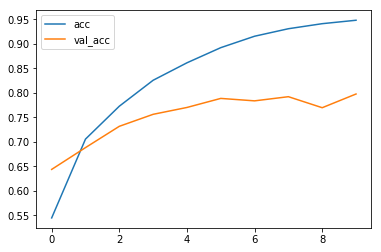

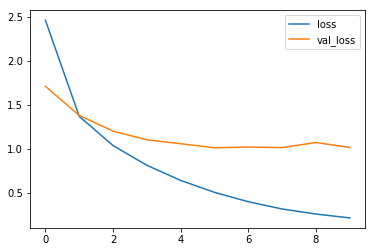

In [11]:
def plot_history(history):
    plt.plot(history["acc"], label="acc")
    plt.plot(history["val_acc"], label="val_acc")
    plt.legend()
    plt.show()
    plt.close()
    
    plt.plot(history["loss"], label="loss")
    plt.plot(history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()
    plt.close()

plot_history(history.history)   

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss, test_acc)

2246/2246 [==============================] - 0s 103us/step
1.0465661982606802 0.7809439003202179
